### Student perforamnce indicator


import basic library


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Load the dataset
df=pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
# shape of the dataset
df.shape

(1000, 8)

#### Data checker to perform
1. check missing values
2. check duplicate 
3. check data type
4. check the discribe
5. check the number of unique values of each columns
6. check statistics of data set
7. check various categories present in the different categorical column

In [43]:
# check the missing values
df.isna().sum()

# observation their are not missing value here

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [44]:
# Check the duplicate elements present or not
df.duplicated().sum()

# observation no duplicate elemnets

0

In [45]:
# check the outlier present or not
df.describe()

# no outlier present

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [46]:
# datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [47]:
# unique values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [48]:
# seen all unique vaues of each columns
print("Categories in gender are                   ",end=" ")
print(df["gender"].unique())
print("Categories in race_enthnicity are           ",end=" ")
print(df["race_ethnicity"].unique())
print("Categories in parental_level_of_education   ",end=" ")
print(df["parental_level_of_education"].unique())
print("Categories in lunch are                     ",end=" ")
print(df['lunch'].unique())
print("Categories in test_preparation_course       ",end=" ")
print(df["test_preparation_course"].unique())

Categories in gender are                    ['female' 'male']
Categories in race_enthnicity are            ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch are                      ['standard' 'free/reduced']
Categories in test_preparation_course        ['none' 'completed']


In [49]:
# Seen the all numerical columns and categorical columns
numerical_colums=[feature for feature in df.columns if df[feature].dtype != "object"]
print(f'Their are the {len(numerical_colums)}\n feature and they are {numerical_colums}')
categorical_columns=[feature for feature in df.columns if df[feature].dtype =="object"]
print(f'Their are the {len(categorical_columns)}\n feature and they are {categorical_columns}')

Their are the 3
 feature and they are ['math_score', 'reading_score', 'writing_score']
Their are the 5
 feature and they are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Feature engineering


In [50]:
df["Total_score"]=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Find the total student how get full marks

In [51]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f'Number of student with full marks in maths:  {math_full}')
print(f'Number of student with full marks in writing:{writing_full}')
print(f'Number of student with full marks in Reading:{reading_full}')

# conclusion math have worth perform as compared to other score in writing and reading score


Number of student with full marks in maths:  7
Number of student with full marks in writing:14
Number of student with full marks in Reading:17


In [52]:
#  remove the unneccery data set
df.drop(['math_score','reading_score','writing_score'],axis=1,inplace=True)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Total_score,average
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [64]:
#  save the dataset
df.to_csv("data/clean_data.csv")

Data visualization

Average score distribution to make some conclusion
1. histogram
2. kernal distribution function (kde)

<Axes: xlabel='average', ylabel='Count'>

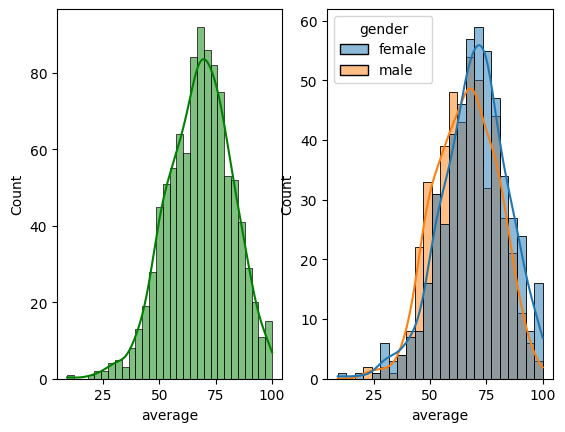

In [53]:
# visulization average wrt to gender
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',hue='gender',kde=True)

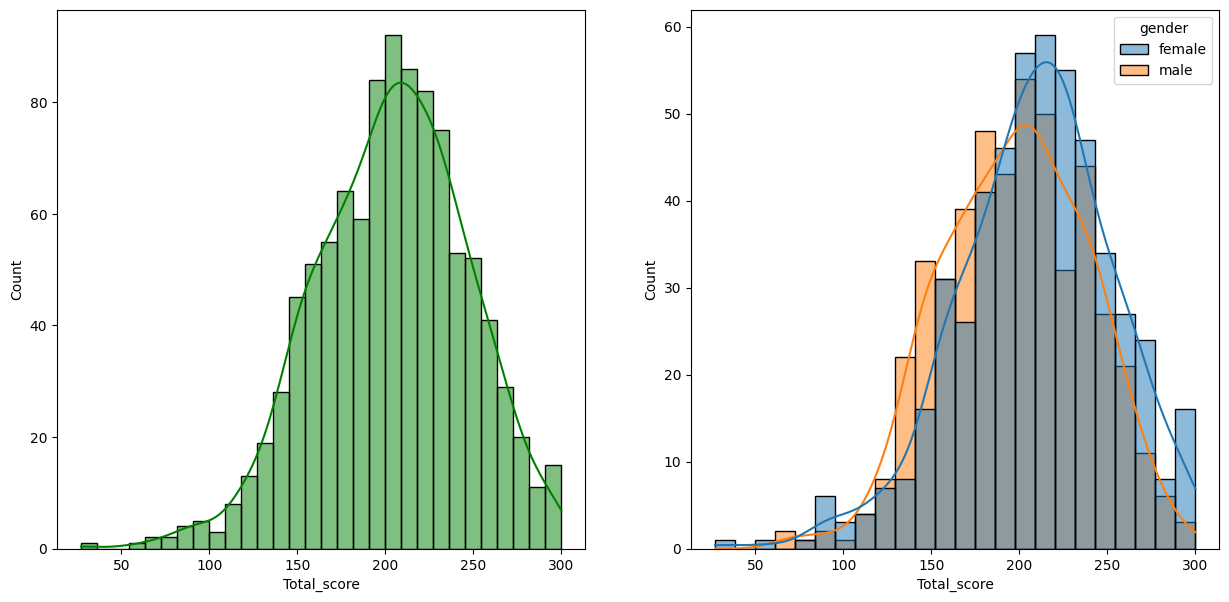

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

Concluzation: Femaile student tend to perform well then male student

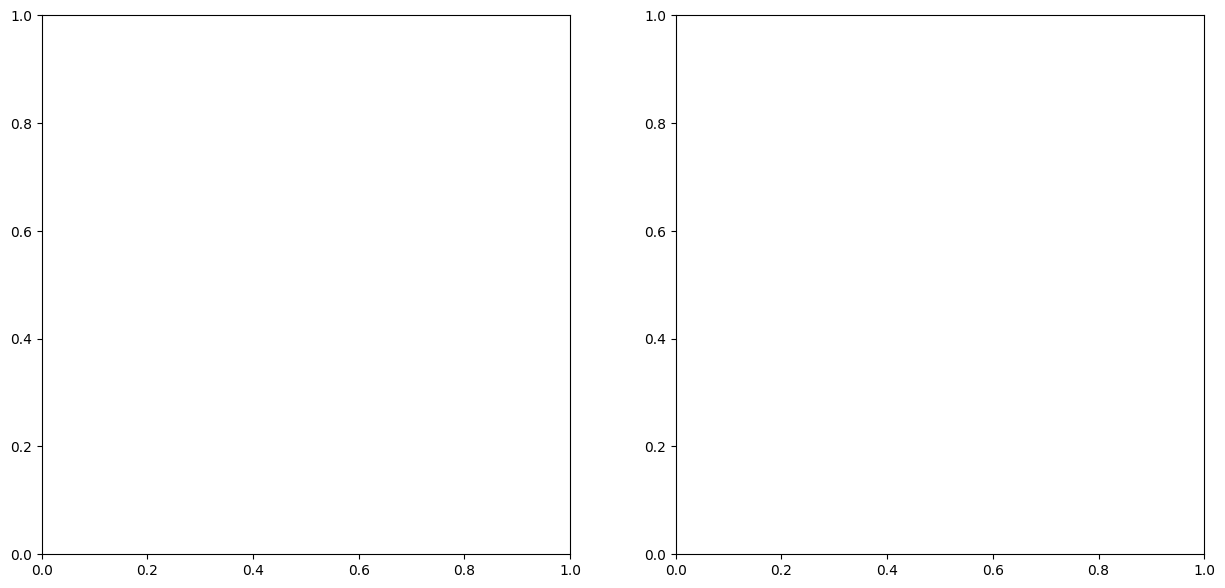

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

In [56]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'Total_score', 'average'],
      dtype='object')

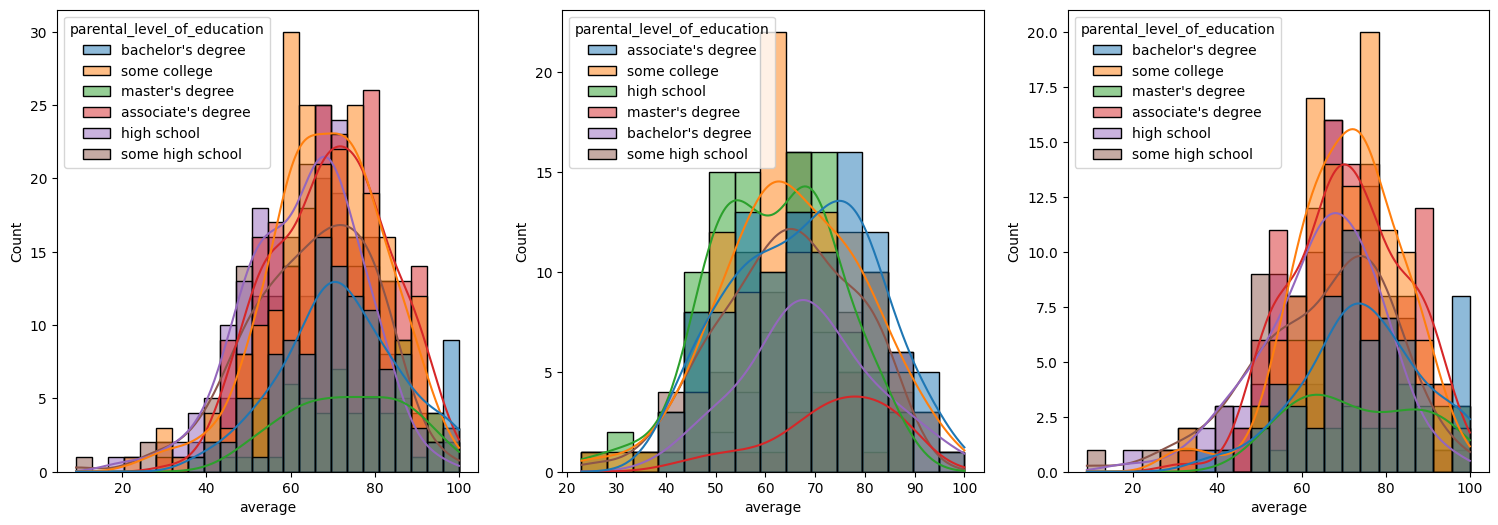

In [57]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

<Axes: xlabel='average', ylabel='Count'>

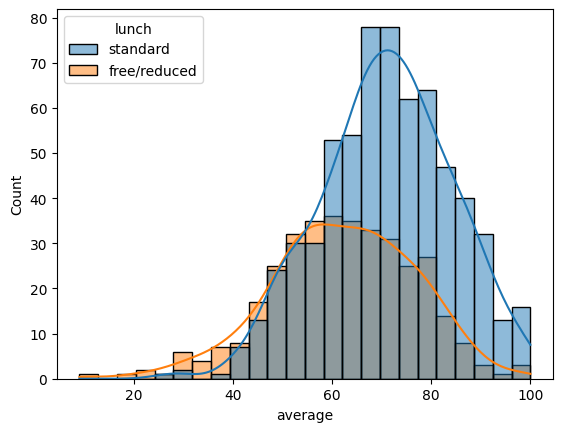

In [58]:
# visulization what was the impace of lunch in averae score of student
plt.subplot(111)
sns.histplot(data=df,x='average',hue='lunch',kde=True)

# The students who receive standard lunch tend to perform better compared to those 
# who receive free or reduced lunch.

In [59]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

Text(0.5, 1.0, 'Avg/female/race_ethnicity')

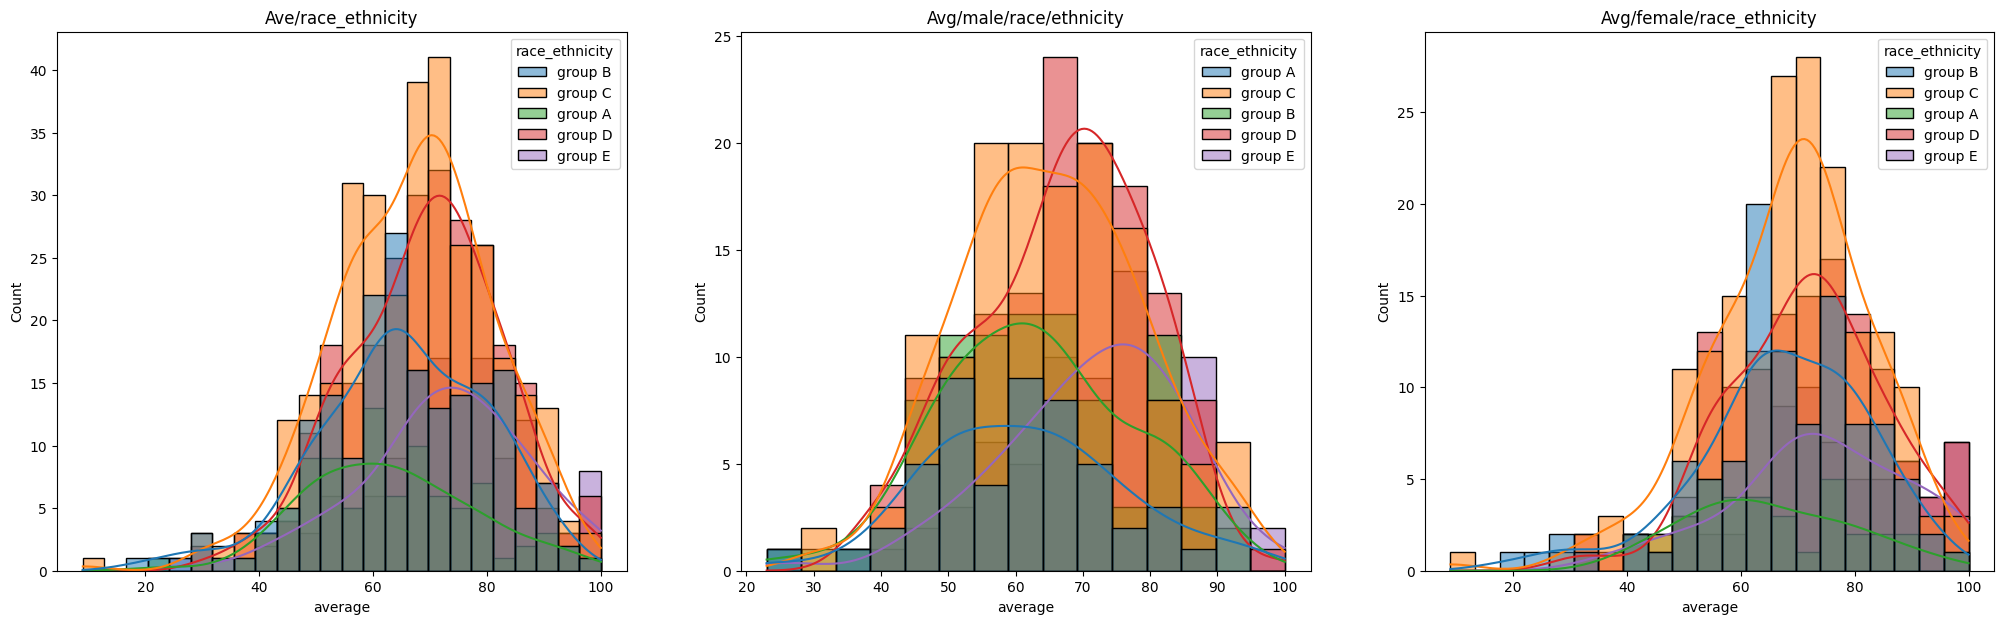

In [60]:
# Which race/ethnicity group performs best on average?
plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
ax=sns.histplot(data=df,x='average',hue='race_ethnicity',kde=True)
plt.title('Ave/race_ethnicity')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title('Avg/male/race/ethnicity')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.title('Avg/female/race_ethnicity')
# conclustion: group B have high avergae score
# Group C & D → High performers
# Group A & B → Low performers
# Group E → Average performers.

Text(0.5, 1.0, 'Avg/female/test_preparation_course')

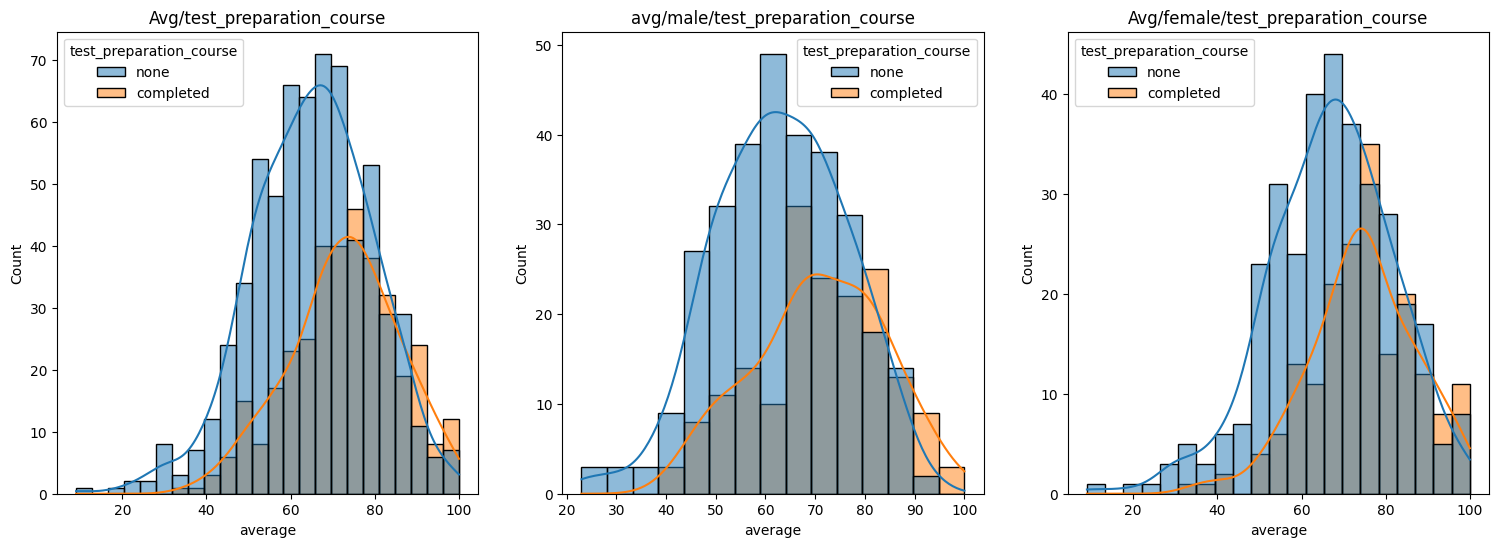

In [61]:
# Compare the average score between students who completed and did not complete the course.
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',hue='test_preparation_course',kde=True)
plt.title('Avg/test_preparation_course')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',hue='test_preparation_course',kde=True)
plt.title('avg/male/test_preparation_course')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',hue='test_preparation_course',kde=True)
plt.title('Avg/female/test_preparation_course')


# From the analysis, it appears that students who did not complete the test preparation course generally
#  achieved higher average scores compared to those who completed the course.

In [62]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Total_score,average
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


ValueError: Could not interpret value `math_score` for `y`. An entry with this name does not appear in `data`.

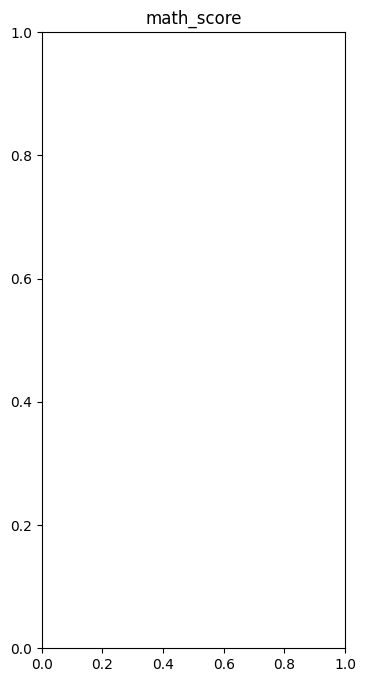

In [63]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('math_score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('reading_score')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('writing_score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()